The goal of this practice analysis is to try to find a model to predict whether adult income is greater than 50K, based on individual features. 

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('adult_data.txt', index_col = False,  sep=", ")
data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,age,workclass,mystery,education_level,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [376]:
# visualization
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss', 'hours-per-week']):
        plt.hist(data[feature], bins = 25, color = 'blue')
        plt.title(feature)
        plt.show()

    
    
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000','#aaafff']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train',  'pred_time', 'acc_test', 'precision','recall']):
                # Creative plot code
                ax[j//3, j%3].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("Time (in seconds)")
    ax[1, 0].set_ylabel("Accuracy Score")
    ax[1, 1].set_ylabel("Precision")
    ax[1, 2].set_ylabel("Recall")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("Model Testing")
    ax[1, 0].set_title("Accuracy Score on Testing Set")
    ax[1, 1].set_title("Precision on Test")
    ax[1, 2].set_title("Recall on Test")
        
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        plt.bar(0, 0, color=colors[i], label=learner)
    plt.legend()
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

    


In [228]:
print(data.head())
print(data.describe())

data[['income']].agg(['count'])
# count the number 
data.groupby(['income']).size()



   age         workclass  mystery education_level  education_num  \
0   39         State-gov    77516       Bachelors             13   
1   50  Self-emp-not-inc    83311       Bachelors             13   
2   38           Private   215646         HS-grad              9   
3   53           Private   234721            11th              7   
4   28           Private   338409       Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1     

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,0,0,1
6,0,0,1,0,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [381]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


def scale_data(feature):
    transformed_feature = feature 
    scaler = MinMaxScaler() # default scaling between 0 to 1
    numerical_var = ['age','education_num', 'capital-gain','capital-loss','hours-per-week']
    transformed_feature[numerical_var] = scaler.fit_transform(transformed_feature[numerical_var])
    return transformed_feature

 
# Data Encoder 
def getDummies(feature_data, field):
    dumdata = pd.get_dummies(feature_data[field])
    dum_fields = dumdata.columns
    for f in dum_fields:
        feature_data[f] = dumdata[f]
    feature_data = feature_data.drop(field, axis=1)
    return feature_data

def encodeBin(col, one_cat):
    encoded_col = col.apply(lambda x: 1 if x==one_cat  else 0)
    return encoded_col

def transform_data(feature):
    fields = ['age','education_num','capital-gain','capital-loss','hours-per-week','sex','race','workclass']
    transform_feature = feature[fields]
    transform_feature = scale_data(transform_feature)
    # fields to encode 
    transform_feature['sex'] = encodeBin(transform_feature['sex'],'Female')
    transform_feature = getDummies(transform_feature, 'race')
    transform_feature = getDummies(transform_feature, 'workclass')
    return transform_feature

    


In [382]:
# Scale the data with MinMaxScaler 
# and encode any variable we want to incldue 


label  = data['income']
feature = data.drop(['income'], axis=1)
transform_label = encodeBin(label, '>50K')
transform_data = transform_data(feature)
transform_data

# distribution(feature)
# transform_data = transform_data(feature)
# print(transform_data.head())
# print(transform_label[0:10])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,age,education_num,capital-gain,capital-loss,hours-per-week,sex,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.301370,0.800000,0.021740,0.000000,0.397959,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.452055,0.800000,0.000000,0.000000,0.122449,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.000000,0.397959,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0.493151,0.400000,0.000000,0.000000,0.397959,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0.150685,0.800000,0.000000,0.000000,0.397959,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0.273973,0.866667,0.000000,0.000000,0.397959,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6,0.438356,0.266667,0.000000,0.000000,0.153061,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7,0.479452,0.533333,0.000000,0.000000,0.448980,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,0.191781,0.866667,0.140841,0.000000,0.500000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
9,0.342466,0.800000,0.051781,0.000000,0.397959,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


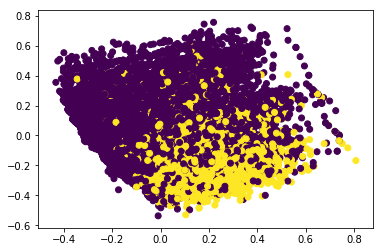

In [383]:
from sklearn.decomposition import PCA
# Visualize the PCA of dataset 

def visualizePCA(feature, label):
    pca = PCA(n_components = 2) # two primary principal compoennt 
    pca_fit = pca.fit_transform(feature)
    pca_fit_pd = pd.DataFrame(pca_fit)
    colors = ['blue','green']
    plt.scatter(pca_fit_pd[0],pca_fit_pd[1], c = label)
#     for val, l in zip(pca_fit,label):
#         plt.scatter(val[0],val[1], color = colors[l])
    plt.show()
    
    
    
# visual continuous variables with PCA,it  does seem like the category seems lineraly separable
visualizePCA(transform_data[['age','education_num','capital-gain',
                            'capital-loss','hours-per-week']], transform_label)
    

In [384]:
# Sample train and test dataset 
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(transform_data, transform_label, test_size = 0.2)


print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(x_train.head())

26048
6513
26048
6513
            age  education_num  capital-gain  capital-loss  hours-per-week  \
24192  0.232877       0.533333           0.0           0.0        0.500000   
137    0.136986       0.666667           0.0           0.0        0.346939   
10734  0.246575       0.600000           0.0           0.0        0.448980   
31036  0.068493       0.600000           0.0           0.0        0.397959   
20751  0.260274       0.600000           0.0           0.0        0.653061   

       sex  Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White  ?  \
24192    0                   0                   0      0      0      1  0   
137      1                   0                   0      0      0      1  0   
10734    0                   0                   0      0      0      1  0   
31036    1                   0                   0      0      0      1  1   
20751    0                   0                   0      0      0      1  0   

       Federal-gov  Local-gov  Never-wor

In [385]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from time import time

# How to evaluate model
# Accuracy, Recall, Precision 

def trainPredict(model, x_train, x_test, y_train, y_test):
    result = {}
    s0 = time()
    model.fit(x_train, y_train)
    s1 = time()
    y_pred_train = model.predict(x_train)
    s2 = time()
    # train the data 
    y_pred_test = model.predict(x_test)
    result['train_time']= (s1-s0)/1000
    result['acc_train'] = accuracy_score(y_train, y_pred_train)
    result['pred_time']= (s2-s1)/1000
    result['acc_test'] = accuracy_score(y_test, y_pred_test)
    result['precision'] = precision_score(y_test, y_pred_test)
    result['recall'] = recall_score(y_test, y_pred_test)
    return result



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


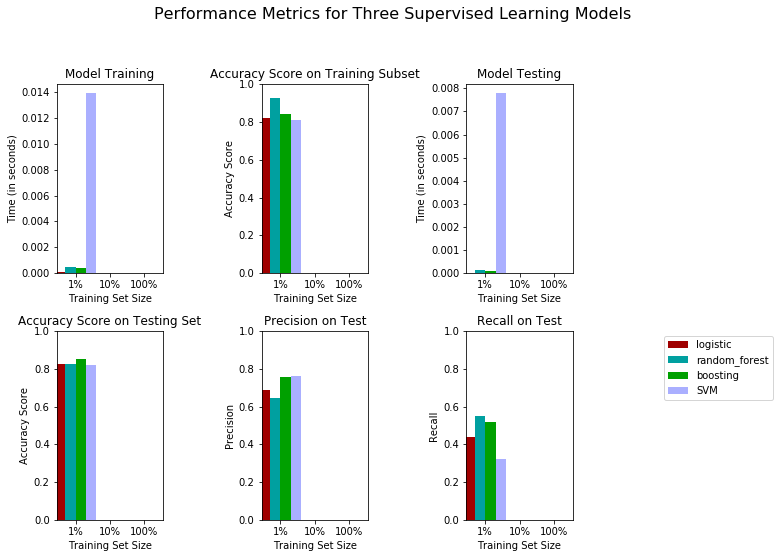

In [388]:
# initialize models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC



result_by_model = {}
modelA = LogisticRegression()
modelB = RandomForestClassifier(n_estimators=30, max_features=5)
modelC = AdaBoostClassifier()
modelD = SVC()
result_by_model['logistic'] = trainPredict(modelA, x_train, x_test, y_train, y_test)
result_by_model['random_forest'] = trainPredict(modelB, x_train, x_test, y_train, y_test)
result_by_model['boosting'] = trainPredict(modelC, x_train, x_test, y_train, y_test)
result_by_model['SVM'] = trainPredict(modelD, x_train, x_test, y_train, y_test)


    
evaluate(result_by_model)

Based on above analysis, it seems like logistic model is the most efficient to use without significant loss to accuracy, precision or recall. However, overall boosting renders the highest accurcy on the dataset, and quite well on precision without having to addd to much time to inference.  Although, more parameter tuning may be useful, if the goal is to identify as many as recall as possible, 
